# meringkas berita
berfungsi untuk mengetahui berita secara ringkas

# pembersihan teks

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
import re
import string
import seaborn as sns

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OKTAVIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\OKTAVIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv('berita_kompas.csv')
df.head()

,judul,isi,tanggal,kategori
0,"Bilang ""Rakyat Jelata"" Saat Tanggapi Miftah Hi...","JAKARTA, KOMPAS.com - Juru Bicara (Jubir) Kant...","Kompas.com - 05/12/2024, 19:34 WIB",Nasional
1,Buron Interpol Asal China Raup Rp 284 dari Bis...,"JAKARTA, KOMPAS.com - Buron Interpol asal Chin...","Kompas.com - 05/12/2024, 19:34 WIB",Nasional
2,"Kebakaran Kafe di Kemang, Pegawai Menyelamatka...","JAKARTA, KOMPAS.com - Sebuah kafe di Kemang, J...","Kompas.com - 05/12/2024, 19:29 WIB",Megapolitan
3,Jaksa Tuntut Helena Lim Bayar Uang Pengganti R...,"JAKARTA, KOMPAS.com - Pemilik perusahaan money...","Kompas.com - 05/12/2024, 19:27 WIB",Nasional
4,Real Count Pilkada Tangsel: Benyamin-Pilar Men...,"TANGERANG SELATAN, KOMPAS.com - Calon wali kot...","Kompas.com - 05/12/2024, 19:22 WIB",Megapolitan


preprocessing

In [4]:
def preptext(text):
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
    text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
    text = re.sub(r"[^a-zA-Z :\.]", "", text) # Menghapus tanda baca
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text.lower())

    sw = set(stopwords.words("indonesian"))
    words = [word for word in words if word not in sw]
    return ' '.join(words)


In [5]:
df['isi_baru'] = df['isi'].apply(preptext)

memisahka kalimat berita

In [6]:
kalimat = nltk.sent_tokenize(df['isi_baru'][1])
print(kalimat)

['jakarta kompas.com buron interpol chin yan zhenxing alias yz terlibat judi online berhasil meraup juta yuan setara rp miliar .', 'yz diamankan melintasi pemeriksaan imigrasi pelabuhan internasional batam center senin .', 'geng mengoperasikan platform judi online manipulasi data direktur pengawasan penindakan keimigrasian dirwasdakim yuldi yusman jakarta kamis .', 'menghasilkan keuntungan juta yuan setara rp miliar .', 'baca : kronologi penangkapan sindikat judi online china batam berdasarkan informasi yz diduga terlibat geng kriminal bertanggung mentransfer mencuci uang hasil judi online .', 'platform judi online dioperasikan yz makau dianza .', 'yz ditangkap berdasarkan red notice interpol terkait fugitive wanted for prosecution nomor a tanggal juli .', 'bersangkutan diamankan melintas tpi pelabuhan internasional batam center tanggal desember kapal majestic pelabuhan internasional harbour front singapura yuldi .', 'sekretaris ncb interpol indonesia untung widyatmoko merinci yz terli

TF-IDF

In [7]:
vectorizer = TfidfVectorizer()
tfidf_berita = vectorizer.fit_transform(kalimat)

fitur = vectorizer.get_feature_names_out()
tfidf_hasil = pd.DataFrame(data=tfidf_berita.toarray(), columns=fitur)
tfidf_hasil

,aktivitas,alias,baca,batam,beijing,berdasarkan,berhasil,berkaitan,bernama,bersangkutan,...,uang,untung,wanted,widyatmoko,yan,yuan,yuldi,yusman,yz,zhenxing
0,0.000000,0.260429,0.000000,0.000000,0.000000,0.000000,0.225404,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.260429,0.225404,0.000000,0.000000,0.152214,0.260429
1,0.000000,0.000000,0.000000,0.258347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216926,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236229,0.272935,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.361083,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.211587,0.170167,0.000000,0.211587,0.000000,0.000000,0.000000,0.000000,...,0.244464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142884,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291638,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.254964,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.294582,0.000000,0.000000,0.000000,0.000000,0.000000,0.172176,0.000000
7,0.000000,0.000000,0.000000,0.165482,0.000000,0.000000,0.000000,0.000000,0.000000,0.237735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205763,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302611,0.000000,0.000000,...,0.000000,0.261914,0.000000,0.302611,0.000000,0.000000,0.000000,0.000000,0.176869,0.000000
9,0.364778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.364778,0.000000,...,0.000000,0.315720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Cosine similaritas

In [8]:
cosine = cosine_similarity(tfidf_berita, tfidf_berita)

similaritas = pd.DataFrame(cosine, index=range(len(kalimat)), columns=range(len(kalimat)))
similaritas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.033019,0.094729,0.406949,0.126907,0.120229,0.052415,0.000000,0.138022,0.055441,0.191467,0.057622,0.000000,0.080974
1,0.033019,1.000000,0.000000,0.000000,0.074957,0.063264,0.037349,0.398024,0.038368,0.000000,0.228080,0.000000,0.089182,0.000000
2,0.094729,0.000000,1.000000,0.000000,0.127862,0.160244,0.000000,0.048607,0.048202,0.117148,0.042352,0.000000,0.000000,0.000000
3,0.406949,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.126907,0.074957,0.127862,0.000000,1.000000,0.184047,0.078548,0.028160,0.191335,0.170888,0.274793,0.000000,0.074201,0.044580
5,0.120229,0.063264,0.160244,0.000000,0.184047,1.000000,0.050213,0.000000,0.139703,0.486864,0.077428,0.000000,0.000000,0.000000
6,0.052415,0.037349,0.000000,0.000000,0.078548,0.050213,1.000000,0.052462,0.060905,0.063727,0.112190,0.121753,0.000000,0.037874
7,0.000000,0.398024,0.048607,0.000000,0.028160,0.000000,0.052462,1.000000,0.000000,0.000000,0.098742,0.000000,0.114250,0.000000
8,0.138022,0.038368,0.048202,0.000000,0.191335,0.139703,0.060905,0.000000,1.000000,0.229804,0.236351,0.172555,0.000000,0.149273
9,0.055441,0.000000,0.117148,0.000000,0.170888,0.486864,0.063727,0.000000,0.229804,1.000000,0.056604,0.070056,0.000000,0.000000


Graph

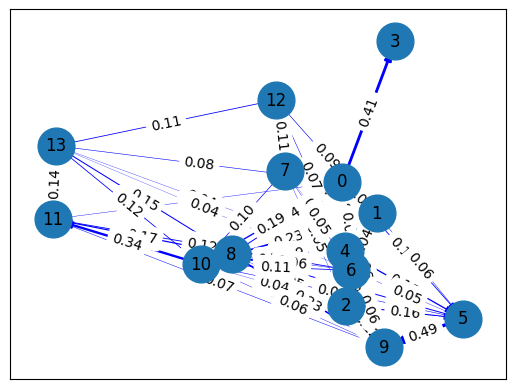

In [9]:
graph = nx.DiGraph()
for i in range(len(cosine)):
    graph.add_node(i)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)): 
        if cosine[i, j] > 0:  
            graph.add_edge(i, j, weight=cosine[i, j])



pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx_nodes(graph, pos, node_size=700)
edges = nx.draw_networkx_edges(
    graph, pos, 
    edge_color='blue', 
    width=[graph[u][v]['weight'] * 5 for u, v in graph.edges()]
)
nx.draw_networkx_labels(graph, pos)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f'{w:.2f}' for u, v, w in graph.edges(data='weight')})

plt.show()

## matrix sentralitas

closeness centrality

In [10]:
closeness_word = nx.closeness_centrality(graph)

sorted_closeness_preprocessing = sorted(closeness_word.items(), key=lambda x: x[1], reverse=True)
print("Closeness Centrality:")
for node, closeness in sorted_closeness_preprocessing:
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 10: 0.6923
Node 13: 0.6516
Node 11: 0.5128
Node 9: 0.4712
Node 8: 0.4615
Node 7: 0.3462
Node 6: 0.3205
Node 12: 0.3141
Node 5: 0.3077
Node 4: 0.2308
Node 1: 0.0769
Node 2: 0.0769
Node 3: 0.0769
Node 0: 0.0000


In [11]:
rangkuman = ""
print("Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:")
for node, closeness_word in sorted_closeness_preprocessing[:3]:
    top_sentence = kalimat[node]
    rangkuman += top_sentence + " "
    print(f"Node {node}: Closeness Centrality = {closeness_word:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:
Node 10: Closeness Centrality = 0.6923
Kalimat: baca : buron interpol sindikat judi online china ditangkap batam berhasil diamankan imigrasi batam tersangka diserahkan ncb interpol indonesia proses hukum .

Node 13: Closeness Centrality = 0.6516
Kalimat: indonesia perlindungan buronan interpol terlibat tindak pidana lintas negara .

Node 11: Closeness Centrality = 0.5128
Kalimat: ncb interpol indonesia menghubungi interpol beijing proses penyerahan tersangka otoritas terkait tiongkok .



membuat rangkuman dengan page rank

In [12]:
ranked_page = nx.pagerank(graph)

sorted_page= sorted(ranked_page.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, ranked_page in sorted_page:
    print(f"Node {node}: {ranked_page:.4f}")

Page Rank :
Node 13: 0.2496
Node 11: 0.1608
Node 10: 0.1205
Node 9: 0.0811
Node 12: 0.0531
Node 8: 0.0507
Node 7: 0.0450
Node 5: 0.0449
Node 4: 0.0381
Node 3: 0.0351
Node 6: 0.0349
Node 2: 0.0297
Node 1: 0.0286
Node 0: 0.0280


In [13]:
import pickle

# Load model and vectorizer from the pickle file
with open('logistic_regression_and_vectorizer.pkl', 'rb') as file:
    loaded_objects = pickle.load(file)

model = loaded_objects['model']
vectorizer = loaded_objects['vectorizer']

In [14]:
ringkasan_pagerank = ""
print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing dan Prediksi Kategori:")
for node, pagerank_preprocessing in sorted_page[:140]:
    top_sentence = kalimat[node]
    ringkasan_pagerank += top_sentence + " "
    
    # Prediksi kategori menggunakan model logistic regression
    vectorized_sentence = vectorizer.transform([top_sentence])
    predicted_category = model.predict(vectorized_sentence)[0]
    
    print(f"Node {node}: Page Rank = {pagerank_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}")
    print(f"Kategori: {predicted_category}\n")



Tiga Node Tertinggi Page Rank Menggunakan Preprocessing dan Prediksi Kategori:
Node 13: Page Rank = 0.2496
Kalimat: indonesia perlindungan buronan interpol terlibat tindak pidana lintas negara .
Kategori: Nasional

Node 11: Page Rank = 0.1608
Kalimat: ncb interpol indonesia menghubungi interpol beijing proses penyerahan tersangka otoritas terkait tiongkok .
Kategori: Nasional

Node 10: Page Rank = 0.1205
Kalimat: baca : buron interpol sindikat judi online china ditangkap batam berhasil diamankan imigrasi batam tersangka diserahkan ncb interpol indonesia proses hukum .
Kategori: Nasional

Node 9: Page Rank = 0.0811
Kalimat: dana diduga terkait aktivitas judi online platform bernama makau dianza untung .
Kategori: Nasional

Node 12: Page Rank = 0.0531
Kalimat: koordinasi lintas lembaga sikap pelaku kriminal internasional .
Kategori: Nasional

Node 8: Page Rank = 0.0507
Kalimat: sekretaris ncb interpol indonesia untung widyatmoko merinci yz terlibat pengumpulan dana masyarakat china berka

hasil rangkuman

In [15]:
ringkasan_pagerank = ""
print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:")
for node, pagerank_preprocessing in sorted_page[:3]:
    top_sentence = kalimat[node]
    ringkasan_pagerank += top_sentence + " "
    print(f"Node {node}: Page Rank = {pagerank_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:
Node 13: Page Rank = 0.2496
Kalimat: indonesia perlindungan buronan interpol terlibat tindak pidana lintas negara .

Node 11: Page Rank = 0.1608
Kalimat: ncb interpol indonesia menghubungi interpol beijing proses penyerahan tersangka otoritas terkait tiongkok .

Node 10: Page Rank = 0.1205
Kalimat: baca : buron interpol sindikat judi online china ditangkap batam berhasil diamankan imigrasi batam tersangka diserahkan ncb interpol indonesia proses hukum .

